In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [206]:
# getting our data


# prenaming the the columns
colnames=['ip', 'timestamp', 'request_method', 'status', 'size',
          'destination', 'request_agent']


# reading the data 
df_orig = pd.read_csv('http://python.zach.lol/access.log',          
                 engine='python',
                 header=None,
                 index_col=False,
                 names = colnames,
                 sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                 na_values='"-"',usecols=[0, 3, 4, 5, 6, 7, 8])


# getting some new data

new = pd.DataFrame([["95.31.18.119", "[21/Apr/2019:10:02:41+0000]", 
                     "GET /api/v1/items/HTTP/1.1", 200, 1153005, np.nan, 
                     "python-requests/2.21.0"],
                    ["95.31.16.121", "[17/Apr/2019:19:36:41+0000]", 
                     "GET /api/v1/sales?page=79/HTTP/1.1", 301, 1005, np.nan, 
                     "python-requests/2.21.0"],
                    ["97.105.15.120", "[18/Apr/2019:19:42:41+0000]", 
                     "GET /api/v1/sales?page=79/HTTP/1.1", 301, 2560, np.nan, 
                     "python-requests/2.21.0"],
                    ["97.105.19.58", "[19/Apr/2019:19:42:41+0000]", 
                     "GET /api/v1/sales?page=79/HTTP/1.1", 200, 2056327, np.nan, 
                     "python-requests/2.21.0"]], columns=colnames)


#merging two dataframes together
df = df_orig.append(new)

In [207]:

# taking a quick look at the data
df.head()

,ip,timestamp,request_method,status,size,destination,request_agent
0,97.105.19.58,[16/Apr/2019:19:34:42 +0000],"""GET /api/v1/sales?page=81 HTTP/1.1""",200,512495,NaN,"""python-requests/2.21.0"""
1,97.105.19.58,[16/Apr/2019:19:34:42 +0000],"""GET /api/v1/items HTTP/1.1""",200,3561,NaN,"""python-requests/2.21.0"""
2,97.105.19.58,[16/Apr/2019:19:34:44 +0000],"""GET /api/v1/sales?page=82 HTTP/1.1""",200,510103,NaN,"""python-requests/2.21.0"""
3,97.105.19.58,[16/Apr/2019:19:34:46 +0000],"""GET /api/v1/sales?page=83 HTTP/1.1""",200,510003,NaN,"""python-requests/2.21.0"""
4,97.105.19.58,[16/Apr/2019:19:34:48 +0000],"""GET /api/v1/sales?page=84 HTTP/1.1""",200,511963,NaN,"""python-requests/2.21.0"""


In [208]:
# cleaning data by replacing different characters

df.timestamp = df.timestamp.str.replace(r'(\[|\])', '', regex=True)
df.timestamp= pd.to_datetime(df.timestamp.str.replace(':', ' ', 1)) 


# setting timestamp as the index
df = df.set_index('timestamp')

In [209]:
df

,ip,request_method,status,size,destination,request_agent
timestamp,,,,,,
2019-04-16 19:34:42+00:00,97.105.19.58,"""GET /api/v1/sales?page=81 HTTP/1.1""",200,512495,NaN,"""python-requests/2.21.0"""
2019-04-16 19:34:42+00:00,97.105.19.58,"""GET /api/v1/items HTTP/1.1""",200,3561,NaN,"""python-requests/2.21.0"""
2019-04-16 19:34:44+00:00,97.105.19.58,"""GET /api/v1/sales?page=82 HTTP/1.1""",200,510103,NaN,"""python-requests/2.21.0"""
2019-04-16 19:34:46+00:00,97.105.19.58,"""GET /api/v1/sales?page=83 HTTP/1.1""",200,510003,NaN,"""python-requests/2.21.0"""
2019-04-16 19:34:48+00:00,97.105.19.58,"""GET /api/v1/sales?page=84 HTTP/1.1""",200,511963,NaN,"""python-requests/2.21.0"""
...,...,...,...,...,...,...
2019-04-17 12:55:14+00:00,97.105.19.58,"""GET /api/v1/sales?page=71 HTTP/1.1""",200,510166,NaN,"""python-requests/2.21.0"""
2019-04-21 10:02:41+00:00,95.31.18.119,GET /api/v1/items/HTTP/1.1,200,1153005,NaN,python-requests/2.21.0
2019-04-17 19:36:41+00:00,95.31.16.121,GET /api/v1/sales?page=79/HTTP/1.1,301,1005,NaN,python-requests/2.21.0


In [210]:

# more data cleaning
for col in ['request_method', 'request_agent', 'destination']:
    df[col] = df[col].str.replace('"', '')

df['request_method'] = df.request_method.str.replace(r'\?page=[0-9]+', '', regex=True)

df.head()

,ip,request_method,status,size,destination,request_agent
timestamp,,,,,,
2019-04-16 19:34:42+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,NaN,python-requests/2.21.0
2019-04-16 19:34:42+00:00,97.105.19.58,GET /api/v1/items HTTP/1.1,200,3561,NaN,python-requests/2.21.0
2019-04-16 19:34:44+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510103,NaN,python-requests/2.21.0
2019-04-16 19:34:46+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510003,NaN,python-requests/2.21.0
2019-04-16 19:34:48+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,511963,NaN,python-requests/2.21.0


In [211]:

# feature engineering to create a new col that represents the size in megabytes
df['size_mb'] = [n/1024/1024 for n in df['size']]

In [212]:
# descriptive stats on the dataframe
df.describe()

,status,size,size_mb
count,13978.000000,1.397800e+04,13978.000000
mean,200.356703,4.500019e+05,0.429155
std,10.182001,1.614915e+05,0.154010
min,200.000000,0.000000e+00,0.000000
25%,200.000000,5.006370e+05,0.477445
50%,200.000000,5.101380e+05,0.486506
75%,200.000000,5.112910e+05,0.487605
max,499.000000,2.056327e+06,1.961066


In [213]:
df

,ip,request_method,status,size,destination,request_agent,size_mb
timestamp,,,,,,,
2019-04-16 19:34:42+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,NaN,python-requests/2.21.0,0.488753
2019-04-16 19:34:42+00:00,97.105.19.58,GET /api/v1/items HTTP/1.1,200,3561,NaN,python-requests/2.21.0,0.003396
2019-04-16 19:34:44+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510103,NaN,python-requests/2.21.0,0.486472
2019-04-16 19:34:46+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510003,NaN,python-requests/2.21.0,0.486377
2019-04-16 19:34:48+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,511963,NaN,python-requests/2.21.0,0.488246
...,...,...,...,...,...,...,...
2019-04-17 12:55:14+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510166,NaN,python-requests/2.21.0,0.486532
2019-04-21 10:02:41+00:00,95.31.18.119,GET /api/v1/items/HTTP/1.1,200,1153005,NaN,python-requests/2.21.0,1.099591
2019-04-17 19:36:41+00:00,95.31.16.121,GET /api/v1/sales/HTTP/1.1,301,1005,NaN,python-requests/2.21.0,0.000958


In [214]:
ip_proba = pd.DataFrame(df.ip.value_counts().div(len(df)))

In [215]:
ip_proba.reset_index(inplace = True)
#.rename(columns={'index': 'ip', 'ip': 'ip_proba'})

In [216]:
ip_proba.rename(columns={'index': 'ip', 'ip': 'ip_proba'}, inplace = True)

In [217]:
df = df.merge(ip_proba, how = 'left', on = 'ip')

In [218]:
df.fillna(0, inplace = True)

In [219]:
df

,ip,request_method,status,size,destination,request_agent,size_mb,ip_proba
0,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,0,python-requests/2.21.0,0.488753,0.858420
1,97.105.19.58,GET /api/v1/items HTTP/1.1,200,3561,0,python-requests/2.21.0,0.003396,0.858420
2,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510103,0,python-requests/2.21.0,0.486472,0.858420
3,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510003,0,python-requests/2.21.0,0.486377,0.858420
4,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,511963,0,python-requests/2.21.0,0.488246,0.858420
...,...,...,...,...,...,...,...,...
13973,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510166,0,python-requests/2.21.0,0.486532,0.858420
13974,95.31.18.119,GET /api/v1/items/HTTP/1.1,200,1153005,0,python-requests/2.21.0,1.099591,0.000072
13975,95.31.16.121,GET /api/v1/sales/HTTP/1.1,301,1005,0,python-requests/2.21.0,0.000958,0.000072
13976,97.105.15.120,GET /api/v1/sales/HTTP/1.1,301,2560,0,python-requests/2.21.0,0.002441,0.000072


In [220]:
df

,ip,request_method,status,size,destination,request_agent,size_mb,ip_proba
0,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,0,python-requests/2.21.0,0.488753,0.858420
1,97.105.19.58,GET /api/v1/items HTTP/1.1,200,3561,0,python-requests/2.21.0,0.003396,0.858420
2,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510103,0,python-requests/2.21.0,0.486472,0.858420
3,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510003,0,python-requests/2.21.0,0.486377,0.858420
4,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,511963,0,python-requests/2.21.0,0.488246,0.858420
...,...,...,...,...,...,...,...,...
13973,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510166,0,python-requests/2.21.0,0.486532,0.858420
13974,95.31.18.119,GET /api/v1/items/HTTP/1.1,200,1153005,0,python-requests/2.21.0,1.099591,0.000072
13975,95.31.16.121,GET /api/v1/sales/HTTP/1.1,301,1005,0,python-requests/2.21.0,0.000958,0.000072
13976,97.105.15.120,GET /api/v1/sales/HTTP/1.1,301,2560,0,python-requests/2.21.0,0.002441,0.000072


In [221]:
# lets get the probability of the ip address

ip_probab= df.groupby('ip').size().div(len(df))

In [222]:
# now lets do a groupby of the dataframe on ip and status, get the size, and divide by the 
# length of the dataframe to get the combined probability of the ip adress and status

# Now, divide that probability by the probability of the ip address to get the probability
# of the said status given the probability


status_given_ip = pd.DataFrame(df.groupby(['ip', 'status']).size()
.div(len(df)).div(ip_probab, axis = 0, level = 'ip').\
reset_index().rename(index = str, columns = {0: 'proba_status_given_ip'}))

In [223]:
status_given_ip

,ip,status,proba_status_given_ip
0,173.173.113.51,200,1.000000
1,24.26.242.9,200,1.000000
2,3.88.129.158,200,1.000000
3,3.92.201.136,200,1.000000
4,34.207.64.242,200,1.000000
5,34.229.70.250,200,1.000000
6,35.174.209.2,200,1.000000
7,35.175.171.137,200,1.000000
8,45.23.250.16,200,1.000000
9,52.87.230.102,200,1.000000


In [224]:
ip_status_count = pd.DataFrame(df.groupby(['ip', 'status'])['request_method'].\
                                count().reset_index().\
                                rename(index=str, 
                                       columns={'request_method': 'ip_status_count'}))

In [225]:
ip_status_count 

,ip,status,ip_status_count
0,173.173.113.51,200,1059
1,24.26.242.9,200,21
2,3.88.129.158,200,1
3,3.92.201.136,200,1
4,34.207.64.242,200,1
5,34.229.70.250,200,1
6,35.174.209.2,200,1
7,35.175.171.137,200,2
8,45.23.250.16,200,1
9,52.87.230.102,200,2


In [226]:
ip_status = status_given_ip.merge(ip_status_count)

In [227]:
ip_status

,ip,status,proba_status_given_ip,ip_status_count
0,173.173.113.51,200,1.000000,1059
1,24.26.242.9,200,1.000000,21
2,3.88.129.158,200,1.000000,1
3,3.92.201.136,200,1.000000,1
4,34.207.64.242,200,1.000000,1
5,34.229.70.250,200,1.000000,1
6,35.174.209.2,200,1.000000,1
7,35.175.171.137,200,1.000000,2
8,45.23.250.16,200,1.000000,1
9,52.87.230.102,200,1.000000,2


In [228]:
df

,ip,request_method,status,size,destination,request_agent,size_mb,ip_proba
0,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,0,python-requests/2.21.0,0.488753,0.858420
1,97.105.19.58,GET /api/v1/items HTTP/1.1,200,3561,0,python-requests/2.21.0,0.003396,0.858420
2,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510103,0,python-requests/2.21.0,0.486472,0.858420
3,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510003,0,python-requests/2.21.0,0.486377,0.858420
4,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,511963,0,python-requests/2.21.0,0.488246,0.858420
...,...,...,...,...,...,...,...,...
13973,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510166,0,python-requests/2.21.0,0.486532,0.858420
13974,95.31.18.119,GET /api/v1/items/HTTP/1.1,200,1153005,0,python-requests/2.21.0,1.099591,0.000072
13975,95.31.16.121,GET /api/v1/sales/HTTP/1.1,301,1005,0,python-requests/2.21.0,0.000958,0.000072
13976,97.105.15.120,GET /api/v1/sales/HTTP/1.1,301,2560,0,python-requests/2.21.0,0.002441,0.000072


In [229]:
# creating a dataframe of request agent and its probability

request_df = pd.DataFrame(df.request_agent.value_counts().div(len(df))).\
            reset_index().rename(index = str, columns = {'index':'request_agent', 'request_agent': 'req_proba'})
request_df

,request_agent,req_proba
0,python-requests/2.21.0,0.858850
1,python-requests/2.20.1,0.136715
2,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,0.002432
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; ...,0.000572
4,Slackbot-LinkExpanding 1.0 (+https://api.slack...,0.000501
5,Slackbot 1.0 (+https://api.slack.com/robots),0.000429
6,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3...,0.000286
7,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3...,0.000143
8,Python-urllib/3.7,0.000072


In [230]:
# merging the above created dataframe to the original dataframe

df = df.merge(request_df, on = 'request_agent', how = 'left')

In [231]:
# getting the probability of ip
ip_proba = df.groupby('ip').size().div(len(df))


# getting the probability of the request agent given the probability of the ip address and creating a dataframe
proba_agent_given_ip = pd.DataFrame(df.groupby(['ip', 'request_agent']).size().div(len(df)).div(ip_proba, axis = 0, level = 'ip')).reset_index().rename(index = str, columns = {0: 'proba_agent_given_ip'})

In [232]:
# merging the above created dataframe into the main dataframe
df = df.merge(proba_agent_given_ip, on = 'ip', how = 'left')

In [233]:
df

,ip,request_method,status,size,destination,request_agent_x,size_mb,ip_proba,req_proba,request_agent_y,proba_agent_given_ip
0,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,0,python-requests/2.21.0,0.488753,0.85842,0.85885,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3...,0.000167
1,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,0,python-requests/2.21.0,0.488753,0.85842,0.85885,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,0.002167
2,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,0,python-requests/2.21.0,0.488753,0.85842,0.85885,Python-urllib/3.7,0.000083
3,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,0,python-requests/2.21.0,0.488753,0.85842,0.85885,python-requests/2.20.1,0.159263
4,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,0,python-requests/2.21.0,0.488753,0.85842,0.85885,python-requests/2.21.0,0.838320
...,...,...,...,...,...,...,...,...,...,...,...
63076,97.105.19.58,GET /api/v1/sales/HTTP/1.1,200,2056327,0,python-requests/2.21.0,1.961066,0.85842,0.85885,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3...,0.000167
63077,97.105.19.58,GET /api/v1/sales/HTTP/1.1,200,2056327,0,python-requests/2.21.0,1.961066,0.85842,0.85885,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,0.002167
63078,97.105.19.58,GET /api/v1/sales/HTTP/1.1,200,2056327,0,python-requests/2.21.0,1.961066,0.85842,0.85885,Python-urllib/3.7,0.000083
63079,97.105.19.58,GET /api/v1/sales/HTTP/1.1,200,2056327,0,python-requests/2.21.0,1.961066,0.85842,0.85885,python-requests/2.20.1,0.159263


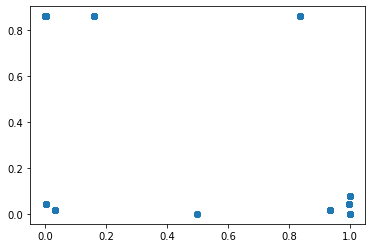

In [234]:
plt.scatter(x = df.proba_agent_given_ip, y = df.ip_proba)

In [289]:
df.request_method.value_counts()/len(df)

GET /api/v1/sales HTTP/1.1                      0.900826
GET /api/v1/items HTTP/1.1                      0.065059
GET /api/v1/stores HTTP/1.1                     0.013919
GET / HTTP/1.1                                  0.007831
GET /documentation HTTP/1.1                     0.007578
GET /favicon.ico HTTP/1.1                       0.001458
GET /api/v1//api/v1/items HTTP/1.1              0.000872
GET /api/v1/items/api/v1/items HTTP/1.1         0.000428
GET /api/v1/items/next_page HTTP/1.1            0.000396
GET /api/v1/store HTTP/1.1                      0.000238
GET /api/v1/itemsitems HTTP/1.1                 0.000238
GET /api/v1/sales/ HTTP/1.1                     0.000238
GET /api/v1/ HTTP/1.1                           0.000190
GET /api/v1items HTTP/1.1                       0.000127
GET /api/v1/sales/HTTP/1.1                      0.000111
GET /api/v1//api/v1/items/next_page HTTP/1.1    0.000079
GET /api/v1/I_DIDNT_DO_IT!!!! HTTP/1.1          0.000079
GET /api/V1/HiZach! HTTP/1.1   

In [278]:
# proba_req = df.request_agent_x.value_counts().div(len(df))

# proba_ip = df.ip.value_counts().div(len(df))

# p = pd.DataFrame(proba_req).reset_index().rename(columns = {'index': 'request_agent', 'request_agent_x': 'probab'})

# p['probab']
                                                             
                                                                                                              

0    0.845136
1    0.151472
2    0.002441
3    0.000380
4    0.000222
5    0.000127
6    0.000111
7    0.000079
8    0.000032
Name: probab, dtype: float64

In [281]:
# pd.DataFrame(df.groupby(['ip', 'request_agent_x']).size().div(len(df))). div(proba_ip, axis = 0, level = 'ip').reset_index().rename(columns = {0: 'proba'})

,ip,request_agent_x,proba
0,173.173.113.51,python-requests/2.21.0,1.000000
1,24.26.242.9,python-requests/2.21.0,1.000000
2,3.88.129.158,Slackbot-LinkExpanding 1.0 (+https://api.slack...,1.000000
3,3.92.201.136,Slackbot-LinkExpanding 1.0 (+https://api.slack...,1.000000
4,34.207.64.242,Slackbot 1.0 (+https://api.slack.com/robots),1.000000
5,34.229.70.250,Slackbot 1.0 (+https://api.slack.com/robots),1.000000
6,35.174.209.2,Slackbot 1.0 (+https://api.slack.com/robots),1.000000
7,35.175.171.137,Slackbot-LinkExpanding 1.0 (+https://api.slack...,1.000000
8,45.23.250.16,python-requests/2.21.0,1.000000
9,52.87.230.102,Slackbot 1.0 (+https://api.slack.com/robots),0.500000


In [282]:
df

,ip,request_method,status,size,destination,request_agent_x,size_mb,ip_proba,req_proba,request_agent_y,proba_agent_given_ip
0,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,0,python-requests/2.21.0,0.488753,0.85842,0.85885,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3...,0.000167
1,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,0,python-requests/2.21.0,0.488753,0.85842,0.85885,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,0.002167
2,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,0,python-requests/2.21.0,0.488753,0.85842,0.85885,Python-urllib/3.7,0.000083
3,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,0,python-requests/2.21.0,0.488753,0.85842,0.85885,python-requests/2.20.1,0.159263
4,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,0,python-requests/2.21.0,0.488753,0.85842,0.85885,python-requests/2.21.0,0.838320
...,...,...,...,...,...,...,...,...,...,...,...
63076,97.105.19.58,GET /api/v1/sales/HTTP/1.1,200,2056327,0,python-requests/2.21.0,1.961066,0.85842,0.85885,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3...,0.000167
63077,97.105.19.58,GET /api/v1/sales/HTTP/1.1,200,2056327,0,python-requests/2.21.0,1.961066,0.85842,0.85885,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,0.002167
63078,97.105.19.58,GET /api/v1/sales/HTTP/1.1,200,2056327,0,python-requests/2.21.0,1.961066,0.85842,0.85885,Python-urllib/3.7,0.000083
63079,97.105.19.58,GET /api/v1/sales/HTTP/1.1,200,2056327,0,python-requests/2.21.0,1.961066,0.85842,0.85885,python-requests/2.20.1,0.159263


**The idea is to use conditional probability to detect the anamolous value for probability**
- In the dataframe above, if we were to calculate the conditional probability of request agent given the ip address:
    - Find the probability of ip address given request agent P(I|RA)
    - Find the probability of request agent P(RA)
    - Find the probability of the ip address P(I)
- Then, the conditional probability will be:
    
    - (P(I|RA) * P(RA))/P(I)



In [286]:
# calculate the probability of RA

proba_request_agen df.request_agent_x.value_counts()/len(df)

python-requests/2.21.0                                                                                                       0.845136
python-requests/2.20.1                                                                                                       0.151472
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36    0.002441
Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0                                           0.000380
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36    0.000222
Slackbot-LinkExpanding 1.0 (+https://api.slack.com/robots)                                                                   0.000127
Slackbot 1.0 (+https://api.slack.com/robots)                                                                                 0.000111
Python-urllib/3.7                                             